<a href="https://colab.research.google.com/github/ManG0A2/MLP-class/blob/main/7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
#함수를 이용한 모델 생성

def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model=model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)  # verbose 0은 훈련 과정 막대 안나오게 하는 매개변수

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


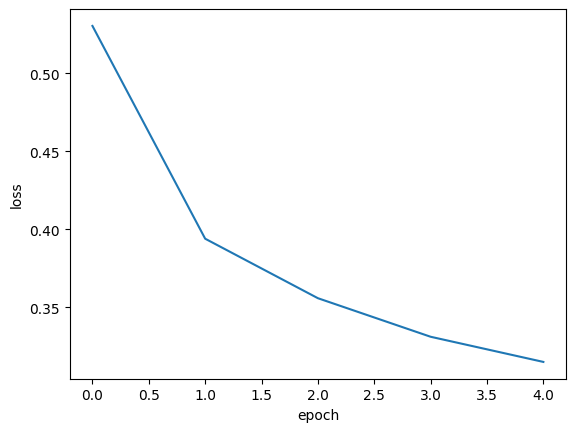

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

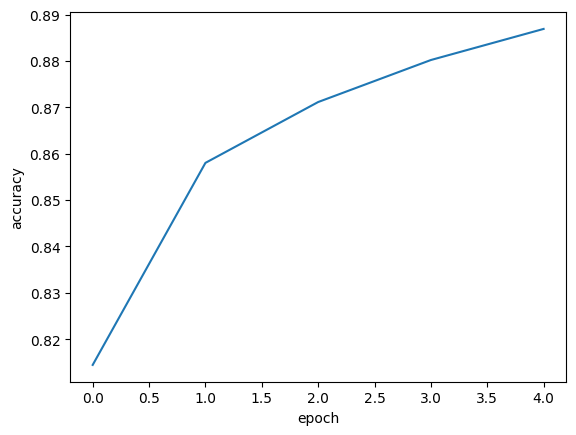

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

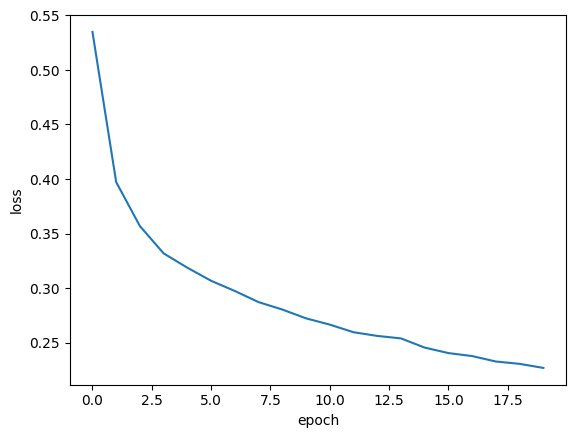

In [8]:
#epoch를 늘려 다시 해보자
#예상대로 손실이 잘 감소한다

model = model_fn()
model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
#검증 손실

model = model_fn()
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


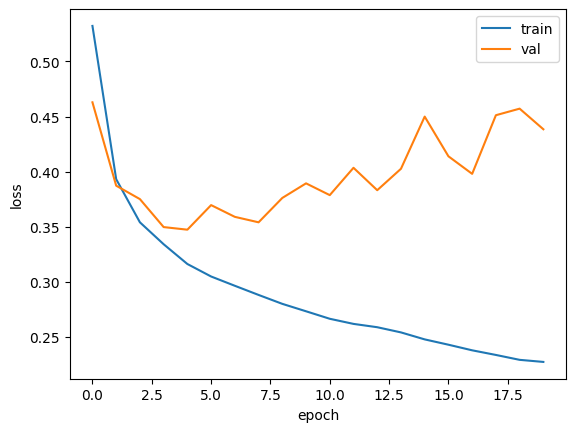

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
'''
초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승하기 시작한다.
훈련 손실은 꾸준히 감소하기 때문에 전형적이 과대적합 모델이 만들어진다.
검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것이다.
'''

'\n초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승하기 시작한다.\n훈련 손실은 꾸준히 감소하기 때문에 전형적이 과대적합 모델이 만들어진다.\n검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것이다.\n'

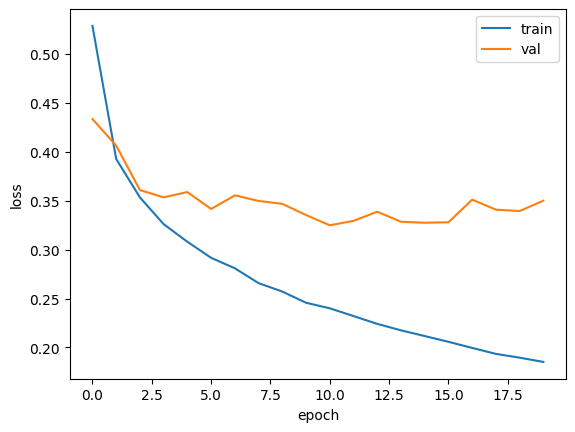

In [13]:
#옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화
#adam 은 적응적 학습률을 적응하기 때문에 그나마 괜찮을것임

model = model_fn()
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [14]:
#dropout
#훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 비활성화 시켜(즉 뉴런의 출력을 0으로 만들어) 과대적합을 막는다.
#물론 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야한다.

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


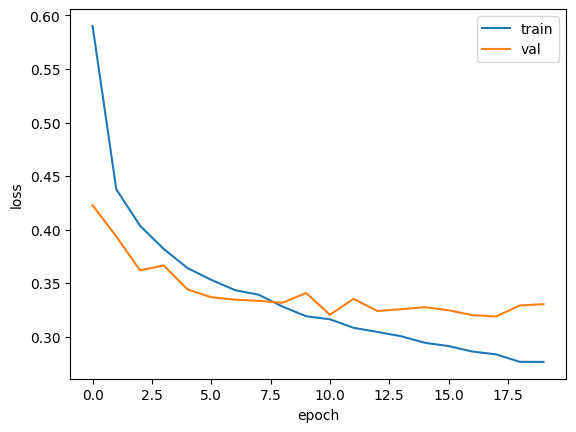

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

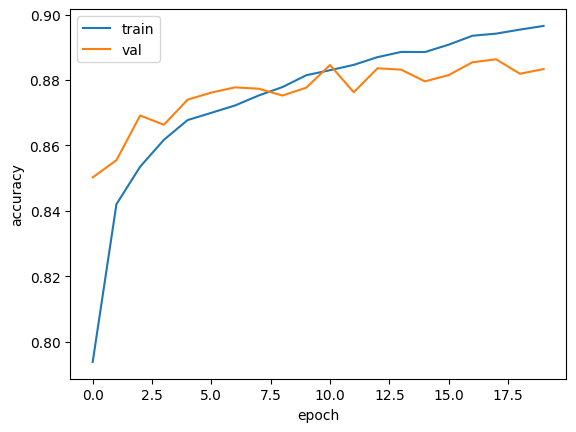

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [17]:
#모델 저장과 복원

model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=8, verbose=0, validation_data=(val_scaled, val_target))

In [18]:
# 훈련된 모델의 파라미터를 저장하는 간편한 save_weight()메서드
model.save_weights('model-weights.h5')

In [19]:
#모델의 구조와 파라메타를 모두 저장하는 save() 메서드
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Nov 12 08:57 model-weights.h5
-rw-r--r-- 1 root root 981176 Nov 12 08:57 model-whole.h5


In [21]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.8791666666666667


In [23]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3314 - accuracy: 0.8792


[0.33140990138053894, 0.8791666626930237]

In [24]:
#callback

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0,
         validation_data=(val_scaled, val_target),
         callbacks=[checkpoint_cb])

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data = (val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

In [26]:
print(early_stopping_cb.stopped_epoch)

11


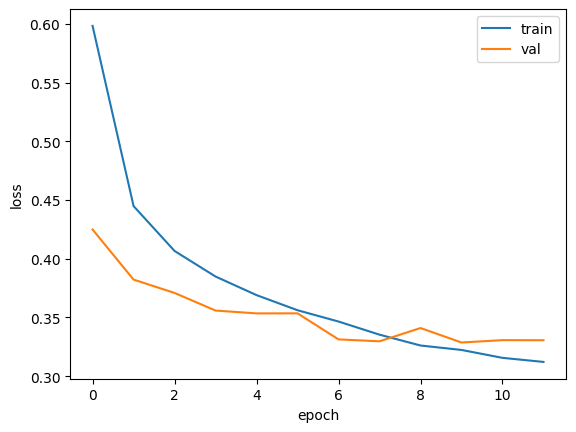

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [28]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8833


[0.3286330997943878, 0.8833333253860474]